In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import matplotlib.font_manager as fm
from tempfile import NamedTemporaryFile

from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

In [2]:
pt_serif = 'https://github.com/google/fonts/raw/a4f3deeca2d7547351ff746f7bf3b51f5528dbcf/ofl/ptserif/PT_Serif-Web-Regular.ttf'
google_font_response = requests.get(pt_serif)

font_name = None
font_prop = None
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
  font_name = f.name
  f.write(google_font_response.content)

  fm.fontManager.addfont(font_name)
  font_prop = fm.FontProperties(fname=font_name)
  sns.set(font=font_prop.get_name())

In [8]:
def create_heatmap_matrix(csv_name):
  df = pd.read_csv(csv_name, usecols=[0,1,2], names=['Experiment 1 Player', 'Experiment 2 Player', "Experiment 1's Wins"])
  df = pd.pivot_table(df, index='Experiment 2 Player', columns='Experiment 1 Player', values="Experiment 1's Wins")


  colors = ["#cb67d8", "#e3e3e3", "#6790df"]
  color_scheme = sns.color_palette(colors)

  sns.set(rc={"figure.figsize":(9, 12)}, font_scale=1.1)
  sns.set_style(rc={"font.sans-serif":font_prop.get_name(), "axes.facecolor":"white"})
  sns.set_context(rc={"axes.labelsize": 18})
  g = sns.heatmap(df, annot=True, cmap=color_scheme, linewidths=1.5, linecolor="white", square=True, cbar=False)
  g.set(xlabel='Experiment 1 Agent', ylabel='Experiment 2 Agent')
  g.invert_yaxis()
  plt.tick_params(axis='x', bottom=False, labelbottom=True, labelrotation=0)
  plt.tick_params(axis='y', left=False, right=False, labelleft=True, labelright=False, labelrotation=0)


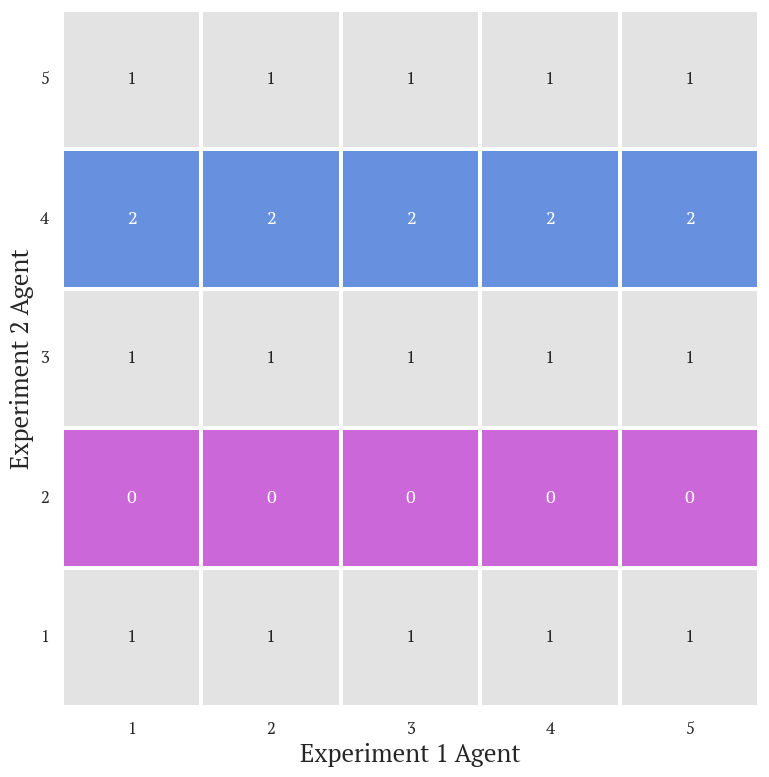

In [9]:
create_heatmap_matrix('exp_comparison.csv')